<a href="https://colab.research.google.com/github/dsrojo10/PDS_UdeA/blob/main/Clase7_22_02_Clase8_27_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase #7 23-Feb-23 & Clase #8 27-Feb-23
### David Santiago Rojo C.

# Ejemplos monitor:


## Ejemplo 1: Transformada Z

In [ ]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

### Transformada Z de una secuencia.

In [ ]:
def transZsec(arr, zero):
    # La funcion recibe un arreglo quees al cual se le va a sacar la
    # transformada y un dato 'zero' que es la posición del cero de la secuencia.
    Z = Symbol('Z')
    pot = zero
    for i in arr:
        print(f'X({-pot}) =', i*np.power(Z, pot))
        pot -= 1

In [ ]:
arr = np.array([1, 2, 3, 4, 5])
arr_trans = transZsec(arr, 2)

X(-2) = Z**2
X(-1) = 2*Z
X(0) = 3
X(1) = 4/Z
X(2) = 5/Z**2


### Transformada Z de una función de la forma $a^nu(n)$

In [ ]:
def transZfunc(a, despla, desplu):
    # Esta función recibe el valor de a para calcular la
    # transformada por medio de la serie geométrica.
    Z = Symbol('Z')
    result = ''
    if (desplu == despla):
        result += str(np.power(Z, -desplu)) + '('
    if (desplu != 0):
        for i in range(desplu):
            result += str(-np.power(a/Z, i))
    result += '+' + str(1/(1-a*np.power(Z, -1))) + ')'
    return result

Supongamos que se ingresa: $x(n)=(\frac{1}{4}^{n-1})u(n-1)$
  


In [ ]:
transZfunc(1/4, 1, 1)

'1/Z(-1+1/(1 - 0.25/Z))'

$X(Z)=-Z^{-1}+\frac{Z}{1-\frac{z^-1}{4}}$

# Ejemplos mios:

En este ejemplo, estamos utilizando la función signal.zpk2tf para convertir los polos y ceros a los coeficientes del numerador y denominador de la función de transferencia. Luego, creamos la función de transferencia utilizando los coeficientes del numerador y denominador, y podemos calcular la respuesta en frecuencia y la fase usando la función signal.bode. La función signal.impulse se puede utilizar para calcular la respuesta al impulso de la función de transferencia.

La salida será una figura con tres subplots. El primer subplot muestra la respuesta en frecuencia en dB, el segundo subplot muestra la fase en grados, y el tercer subplot muestra la respuesta al impulso.

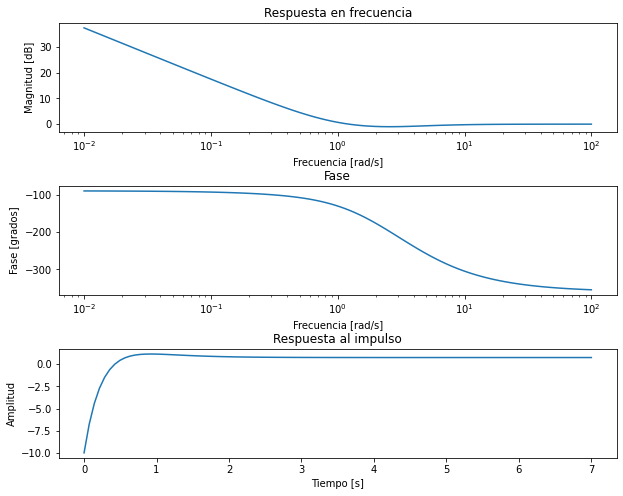

In [14]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Definimos los polos y ceros de la función de transferencia
zeros = [-1, 2, 3]
poles = [0, -2, -4]

# Creamos la función de transferencia
num, den = signal.zpk2tf(zeros, poles, 1)
sys = signal.TransferFunction(num, den)

# Calculamos la respuesta en frecuencia
w, mag, phase = signal.bode(sys)

# Calculamos la respuesta al impulso
t, y = signal.impulse(sys)

# Graficamos la respuesta en frecuencia
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))
ax1.semilogx(w, mag)
ax1.set_title('Respuesta en frecuencia')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')

# Graficamos la fase
ax2.semilogx(w, phase)
ax2.set_title('Fase')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')

# Graficamos la respuesta al impulso
ax3.plot(t, y)
ax3.set_title('Respuesta al impulso')
ax3.set_xlabel('Tiempo [s]')
ax3.set_ylabel('Amplitud')

# Ajustamos los espacios entre los subplots
plt.subplots_adjust(hspace=0.5)

# Mostramos la figura
plt.show()
